## Fetching Dataset

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784')

In [3]:
x, y = mnist['data'], mnist['target']

In [4]:
x.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
%matplotlib inline

In [7]:
import matplotlib
import matplotlib.pyplot as plt

In [53]:
some_digit = x[23525]
some_digit_image = some_digit.reshape(28, 28) # lets reshape it to plot it

(-0.5, 27.5, 27.5, -0.5)

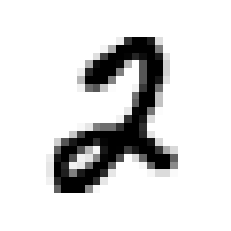

In [54]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [29]:
y[5]

'2'

In [11]:
x_train, x_test = x[0:60000], x[60000:70000]

In [12]:
y_train, y_test = y[0:60000], y[60000:70000]

In [30]:
x[0:60]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [14]:
import numpy as np
shuffle_index = np.random.permutation(6000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

## Creating a 2 detector

In [15]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)

In [16]:
y_train_2

array([ True, False, False, ..., False, False, False])

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf = LogisticRegression(tol = 0.1, solver='lbfgs')

In [19]:
clf.fit(x_train, y_train_2)

C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [56]:
clf.predict([some_digit])

array([ True])

In [21]:
from sklearn.model_selection import cross_val_score
a = cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mod

In [22]:
a.mean()

0.9578333333333333

## Creating a NoN 2 Detector

In [23]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
y_train_not2 = (y_train!=2)
y_test_not2 = (y_test!=2)

In [24]:
clf1 = LogisticRegression(tol = 0.1, solver='lbfgs')

In [25]:
clf1.fit(x_train, y_train_not2)

C:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:760: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(tol=0.1)

In [57]:
clf1.predict([some_digit])

array([False])

In [58]:
y_train_not2.shape
np.count_nonzero(y_train_not2) 

5419